In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Ensure the necessary data files are available
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def construct_graph(text, threshold=0.7):
    # Split text into sentences
    sentences = nltk.sent_tokenize(text)

    # Load pre-trained Sentence Transformer model
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embeddings = model.encode(sentences, convert_to_tensor=True)

    # Calculate cosine similarity matrix
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

    # Create graph
    G = nx.Graph()

    for i, sentence in enumerate(sentences):
        G.add_node(i, sentence=sentence)

    for i in range(len(sentences)):
        for j in range(i+1, len(sentences)):
            if cosine_scores[i][j] > threshold:
                G.add_edge(i, j, weight=cosine_scores[i][j].item())

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

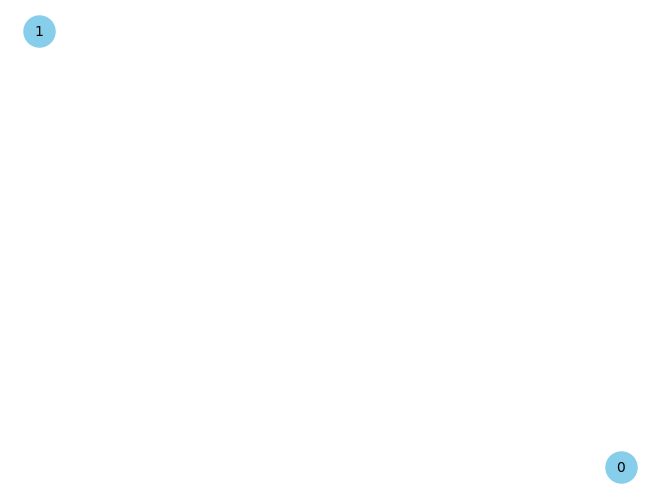

In [9]:
# Example usage
text1 = """I am particularly fond of Python for its versatility and readability.
 It has a robust ecosystem of libraries that make it ideal for Big Data and Machine Learning,
 enabling efficient data manipulation and analysis."""

construct_graph(text1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


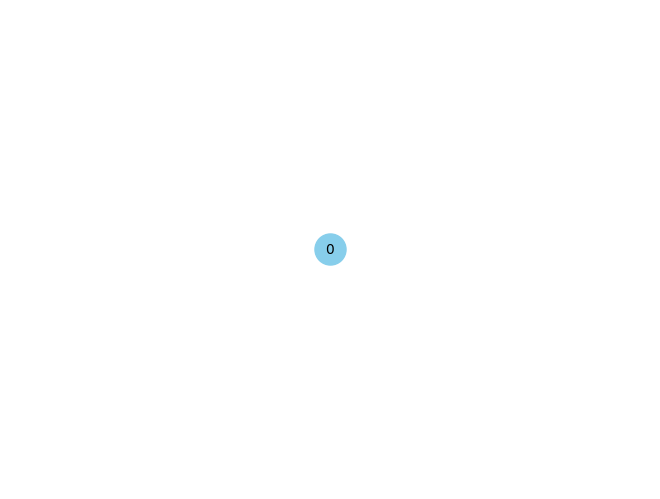

In [10]:
# Example usage
text2 = """Distributed computing is crucial for managing large-scale data It enhances performance,
scalability with frameworks like Apache Hadoop and Spark being instrumental in processing big data efficiently."""

construct_graph(text2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


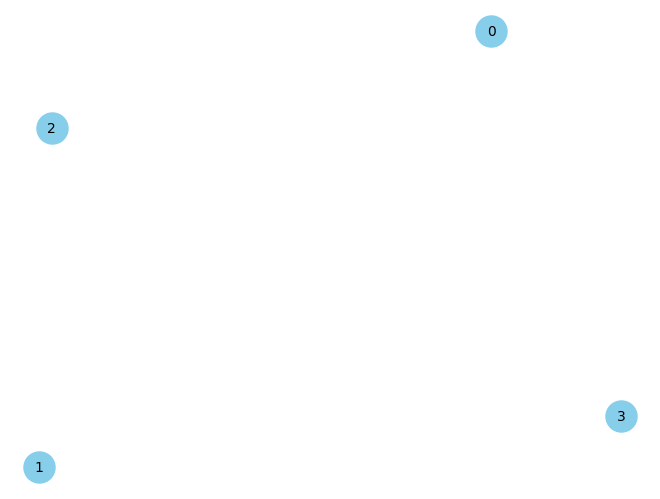

In [11]:
# Example usage
text3= """Virtual reality is an exciting technology. It immerses users in digital environments.
          This technology has applications in gaming, education, and healthcare.
          It provides innovative experiences unlike traditional media."""

construct_graph(text3)